In [25]:
import sys
sys.path.append('..')

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lib.details import find_detail_lines
from lib.data import load_extracted_samples

sns.set_theme(style="whitegrid")

In [27]:
df = pd.read_pickle('../cache/analysis.pkl')

In [28]:
# analyze date
df["year"] = df["median_date"].apply(lambda x: x.year if x is not None else None)
df["month"] = df["median_date"].apply(lambda x: x.month if x is not None else None)
df["year_month"] = df["median_date"].apply(lambda x: f"{x.year}-{x.month:02d}" if x is not None else None)
df["dates_found"] = df["dates"].apply(lambda x: len(x))
df.sort_values(by="year_month", inplace=True)

<Axes: xlabel='year', ylabel='total'>

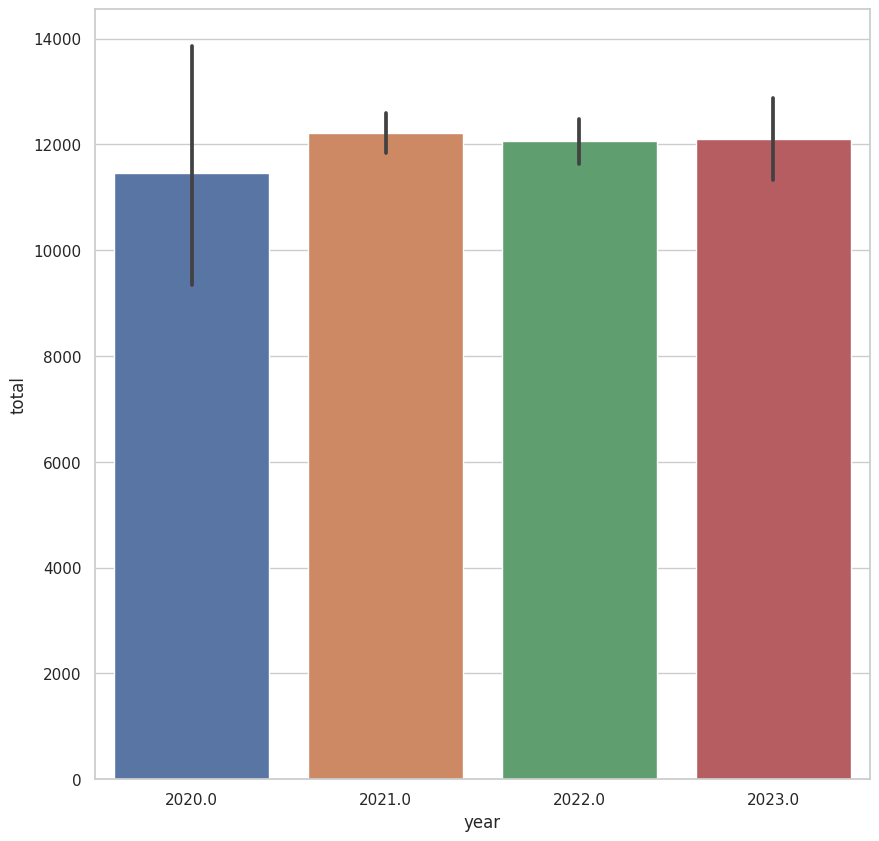

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df, x="year", y="total", ax=ax)

(0.0, 100000.0)

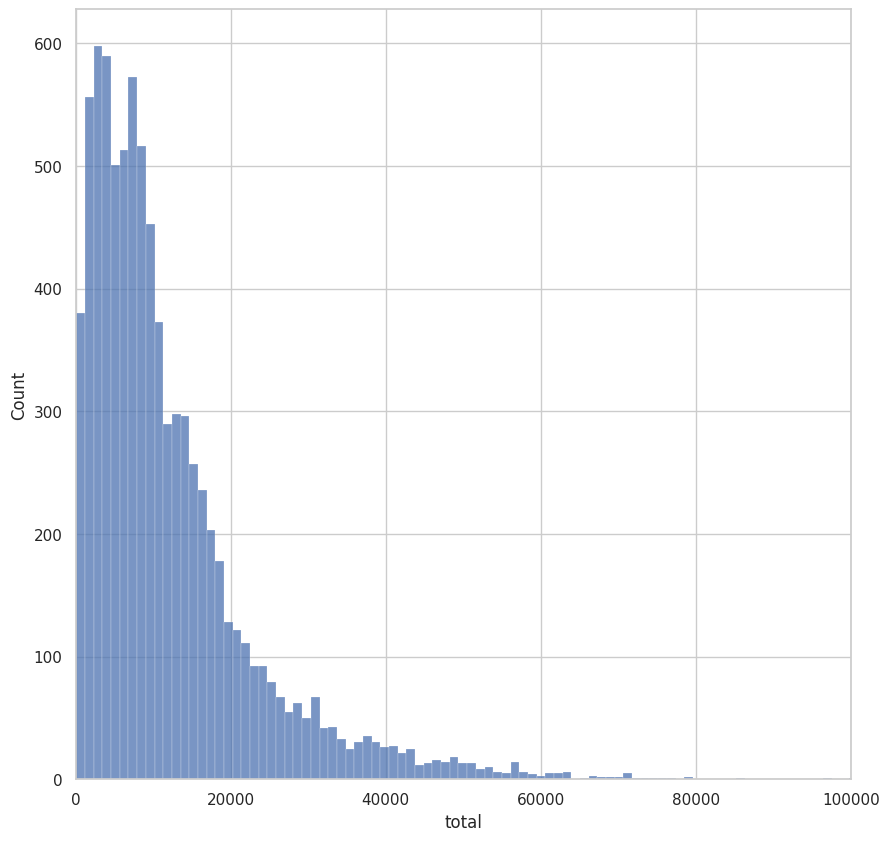

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=df, x="total", ax=ax)
plt.xlim(0, 100000)

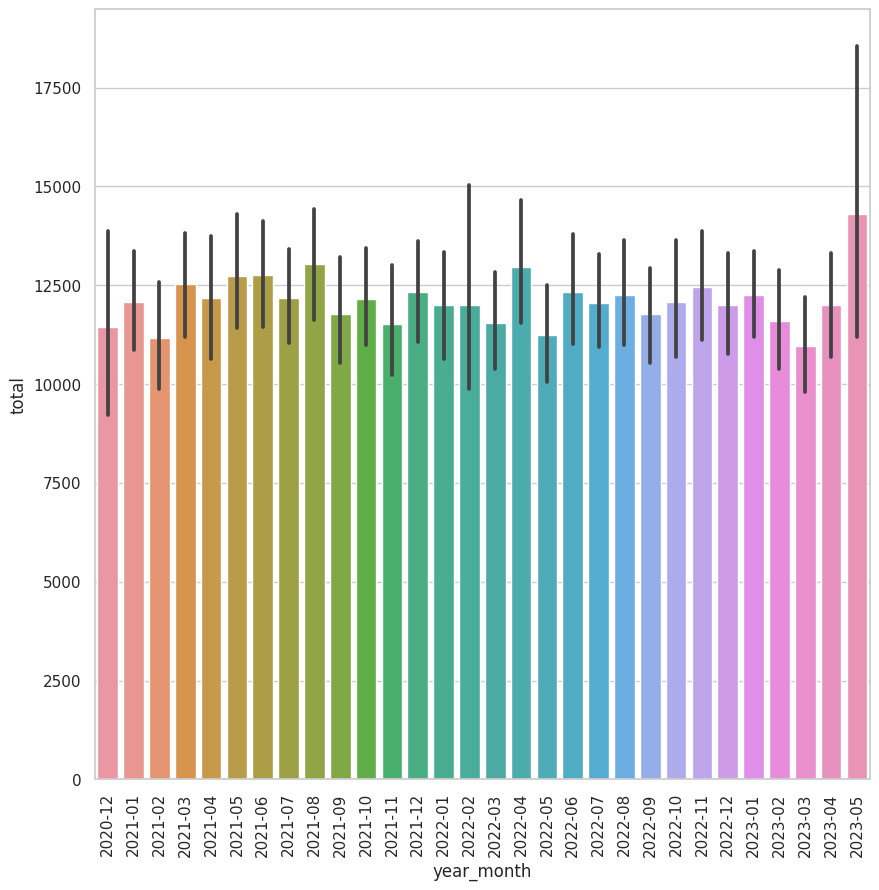

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df, x="year_month", y="total", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

None

<Axes: xlabel='dates_found', ylabel='total'>

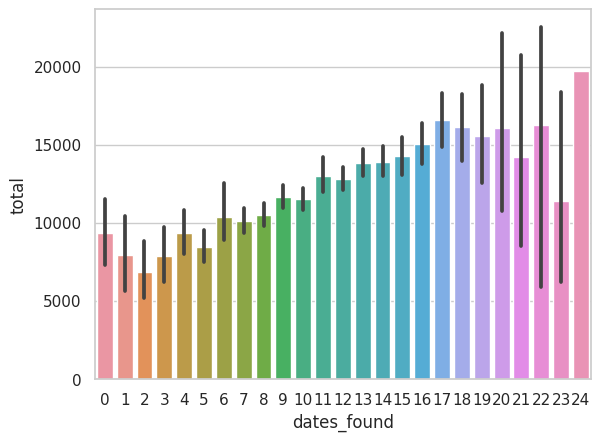

In [32]:
sns.barplot(data=df, x="dates_found", y="total")

(0.0, 60000.0)

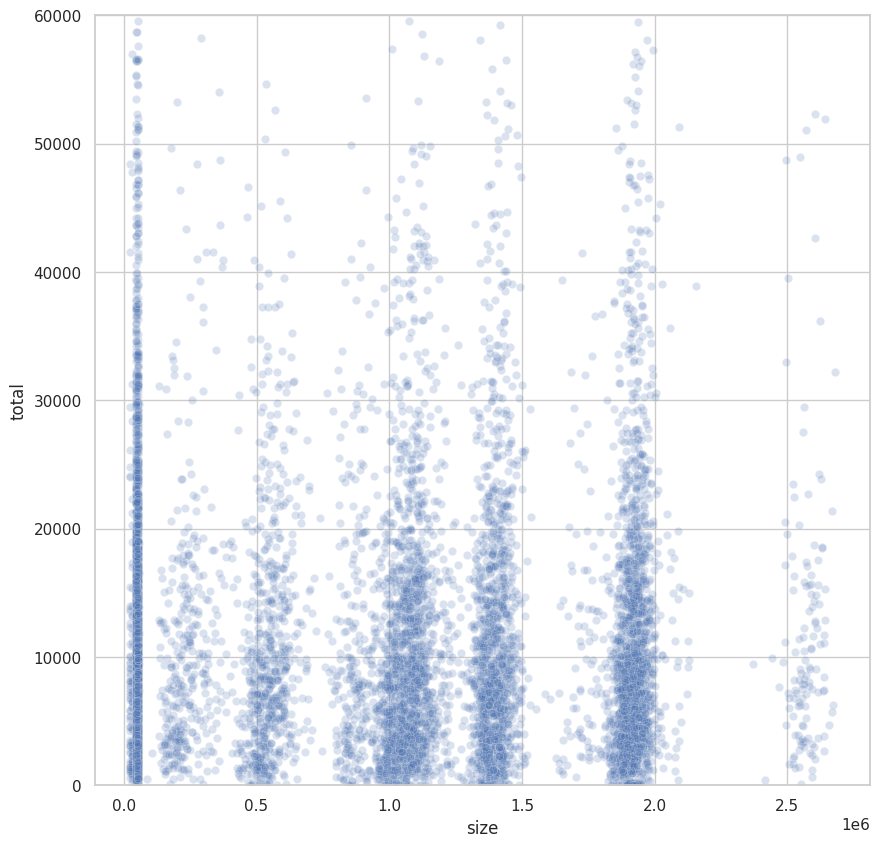

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x="size", y="total", alpha=0.2)
plt.ylim(0, 60000)
#plt.xscale("log")

In [33]:
df[df["total"] < 0]

,filename,size,sample,total,dates,median_date,year,month,year_month,dates_found
2576,Invoice (3729).pdf,1449995,"{'filename': 'Invoice (3729).pdf', 'size': 144...",-3459.96,"[2020-12-20, 2020-12-26, 2020-12-27, 2020-12-2...",2021-01-06,2021.0,1.0,2021-01,17
1455,FlemingLtd_2021-02-24.pdf,1060240,"{'filename': 'FlemingLtd_2021-02-24.pdf', 'siz...",-4666.38,"[2021-01-25, 2021-02-04, 2021-02-04, 2021-02-1...",2021-02-12,2021.0,2.0,2021-02,9
1114,HerringLLC_2021-03-11.pdf,1909581,"{'filename': 'HerringLLC_2021-03-11.pdf', 'siz...",-1679.23,"[2021-02-17, 2021-02-19, 2021-02-22, 2021-02-2...",2021-02-24,2021.0,2.0,2021-02,8
6021,Incoming_inv_ParaisurZ996560_3415.pdf,487386,{'filename': 'Incoming_inv_ParaisurZ996560_341...,-1699.20,"[2021-02-09, 2021-02-12, 2021-02-18, 2021-02-1...",2021-02-20,2021.0,2.0,2021-02,14
7155,HaynesSmith_2021-05-02.pdf,626044,"{'filename': 'HaynesSmith_2021-05-02.pdf', 'si...",-4239.35,"[2021-04-05, 2021-04-06, 2021-04-07, 2021-04-1...",2021-04-19,2021.0,4.0,2021-04,9
3346,I22216022.pdf,46354,"{'filename': 'I22216022.pdf', 'size': 46354, '...",-2133.76,"[2021-05-08, 2021-05-09, 2021-05-09, 2021-05-1...",2021-05-23,2021.0,5.0,2021-05,11
7358,Email_Attachment_2021-07-22_3499.pdf,1988488,{'filename': 'Email_Attachment_2021-07-22_3499...,-3361.49,"[2021-06-22, 2021-06-23, 2021-06-28, 2021-06-3...",2021-07-10,2021.0,7.0,2021-07,16
2928,Invoice (595).pdf,1414443,"{'filename': 'Invoice (595).pdf', 'size': 1414...",-1644.45,"[2021-08-30, 2021-09-01, 2021-09-11, 2021-09-1...",2021-09-13,2021.0,9.0,2021-09,8
5577,OwensNortonandLewis_2021-09-24.pdf,582301,{'filename': 'OwensNortonandLewis_2021-09-24.p...,-1836.86,"[2021-03-02, 2021-03-06, 2021-08-25, 2021-08-2...",2021-09-13,2021.0,9.0,2021-09,16
5136,Email_Attachment_2021-12-04_3222.pdf,54072,{'filename': 'Email_Attachment_2021-12-04_3222...,-1246.12,"[2021-11-08, 2021-11-14, 2021-11-14, 2021-11-1...",2021-11-25,2021.0,11.0,2021-11,11


In [34]:
sample = "2021-11-18_5470.pdf"
find_detail_lines(list(filter(lambda x: x["filename"] == sample, load_extracted_samples()))[0])

[None,
 {'desc': 'Project Her - Cre 1 -$5,379,00',
  'total': -5379.0,
  'total_str': '-S5,379.00'},
 {'desc': 'Associate Engine port 7 $103.48',
  'total': 724.36,
  'total_str': '$724.36'},
 {'desc': 'Travel Expense fi 21-11-01 1 $44.03',
  'total': 44.03,
  'total_str': '$44.03'},
 {'desc': 'Project Manager $176.34', 'total': 176.34, 'total_str': '$176.34'},
 {'desc': 'Admin Fees 53,787.50', 'total': 3787.5, 'total_str': '$3,787.50'},
 {'desc': 'Individual/Group m 2021-11-15 / $270.00',
  'total': 270.0,
  'total_str': '$270.00'},
 {'desc': 'Project Her - Equ part Frtoice rrmber $14.38',
  'total': 14.38,
  'total_str': 'S14.38'},
 {'desc': 'Travel Expense f 21-10-20 1 $2.75',
  'total': 2.75,
  'total_str': '$2.75'},
 {'desc': 'Engineer -trv] we $121.06',
  'total': 121.06,
  'total_str': '$121.06'},
 None,
 {'desc': 'Client meeting or 11-12 1 $61.97',
  'total': 61.97,
  'total_str': 'S61.97'},
 {'desc': 'individual/Group m 2021-[|-15 1 S19.90',
  'total': 19.9,
  'total_str': '$1